# Initials

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import glob
import numpy as np
import sys, os
import netCDF4 as nc
import xarray as xr
from IPython import display
from numpy import loadtxt
from mpl_toolkits.basemap import Basemap
from pyresample import kd_tree,geometry
from pyresample import load_area, save_quicklook, SwathDefinition

In [3]:
'''
for k in range(len(header)):
    print(k)
    print(header[k])
    print(Data[0,k])
    print('')
'''

"\nfor k in range(len(header)):\n    print(k)\n    print(header[k])\n    print(Data[0,k])\n    print('')\n"

In [4]:
useful = np.array([0,0])
print(useful.any())


False


In [5]:
directory = '../RR_OIB/'
files = glob.glob(directory + '*.text')

count = 0
RR = []
prnt = False

for p in range(len(files)):
    
    with open(files[p], 'r') as the_file:
        all_data = [line.strip() for line in the_file.readlines()]
        header = all_data[1].split(',')
        data = all_data[2:]
    
        Data = np.zeros((len(data),len(header)))
    
        for i in range(len(data)):
        
            d = data[i].split(',')
        
            for j in range(np.size(Data[0])):
            
                try:
                    Data[i,j] = d[j]
                except:
                    pass

            #for i in range(len(header)):
            if Data[i,[4,6,84,95]].all():
                count += 1

                #useful[i,:] = Data[i,[0,1,6,4,29,84,95,85,96,61,56]]
                
                try:
                    RR = np.concatenate((RR,np.array([Data[i,[0,1,6,4,29,84,95,85,96,61,56]]])))
                except:
                    RR = np.array([Data[i,[0,1,6,4,29,84,95,85,96,61,56]]])
                    
                    
                if prnt:
                    print('File number:',p,',',i)
                    for k in np.array([0,1,4,6,84,85,95,96]):
                        print('')
                        print(header[k])
                        print(Data[i,k])
                    print('\n')

In [12]:
RR_list = [0,1,6,4,29,50,51,54,55,56,57,58,59,60,61,62,63]

test = []
for i in RR_list:
    test.append(header[i])
    print(header[i])

#latitude
longitude
sit_mean
sd_mean
skt
6.9GHzH
6.9GHzV
10.7GHzH
10.7GHzV
18.7GHzH
18.7GHzV
23.8GHzH
23.8GHzV
36.5GHzH
36.5GHzV
89.0GHzH
89.0GHzV


In [23]:
GR = (RR[:,9]-RR[:,10]) / (RR[:,9]+RR[:,10])
print(GR)

[-0.02595856 -0.02227256 -0.0237341  -0.01965826 -0.02253475 -0.01892128
 -0.02406197 -0.02049141 -0.01710131 -0.01909946 -0.02083799 -0.02004264
 -0.01842588 -0.01986688 -0.02063085 -0.01915071 -0.01923027 -0.01512316
 -0.02173248 -0.02042667 -0.02446506 -0.03112908 -0.03748465 -0.04542128
 -0.04419198 -0.03807691 -0.03356778 -0.03132283 -0.02351314 -0.01438335
 -0.02034917 -0.02215657 -0.02347136 -0.02985389 -0.03367681 -0.03488809
 -0.03711528 -0.02338985 -0.00761092]


In [18]:
test[10]

'36.5GHzV'

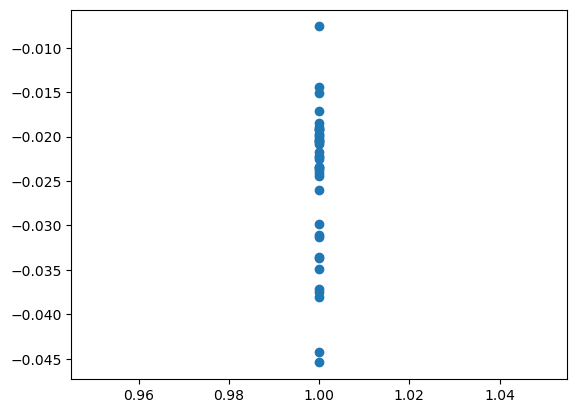

In [6]:
plt.scatter(np.ones(len(GR)),GR)

In [9]:
RR[:,7]-RR[:,8]

array([ 2.57889,  4.91938,  4.01513,  4.7997 ,  6.16864,  1.8759 ,
        3.98659, 14.15068,  6.16112,  1.03702,  1.5479 ,  1.89499,
        2.91667,  2.25334,  3.22037,  4.4422 ,  3.40473,  3.11249,
        4.04462,  4.82263,  3.59169,  4.20882,  3.92023,  4.62512,
        5.50142,  9.06758,  5.07092,  6.44815,  4.65589,  8.59829,
        4.01283,  3.4485 ,  7.18924,  5.78853,  5.11815,  2.15657,
        3.88982,  5.44597,  5.04911])

In [16]:
def ArcticPlot(lat,lon,data,*C):   
    
    d = data
    
    Data = np.ma.array(d,   mask = d < .1)
    Lats = np.ma.array(lat, mask = d < .1)
    Lons = np.ma.array(lon, mask = d < .1)
    
    if len(C) != 2:
        C = [np.min(Data),np.max(Data)]
        
    # res = crude,low,intermediate,high,full
    m = Basemap(projection='npstere',boundinglat=60.0,lon_0=360.0,resolution='c',area_thresh=50000)
    
    # Settings for plot
    m.drawparallels(range(0, 180, 10))
    m.drawmeridians(range(0, 360, 30))
    m.drawmapboundary(fill_color='lightgray')
    m.fillcontinents(color='darkgray',lake_color='gray')
    m.drawcoastlines(linewidth=0.15)
 
    # add temperature data as scatter-plot on map
    x,y = m(Lons,Lats)
    m.scatter(x,y,c=Data,vmin=C[0], vmax=C[1],cmap=plt.cm.jet,edgecolors=None,s=0.15)
    # Brug måske pcolormesh

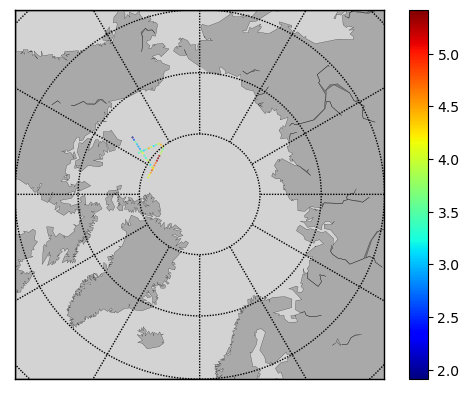

In [22]:
ArcticPlot(RR[:,0],RR[:,1],RR[:,2])
plt.colorbar()